In [2]:
pip install gspread oauth2client

In [56]:
pip install python-igraph

In [60]:
pip install networkx

In [57]:
pip install cairocffi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 2.2 MB/s eta 0:00:00


In [3]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=2600cf841581f16f56f11cb971a1f10bcf23a62568b6cad4e050dfaa1d5d0d5f
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [49]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from igraph import Graph
model = SentenceTransformer('all-MiniLM-L6-v2')

In [17]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Définissez la portée de l'API
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']

# Ajoutez vos credentials
creds = ServiceAccountCredentials.from_json_keyfile_name('/content/matchmaking-405000-bf0da54925d2.json', scope)
client = gspread.authorize(creds)

# Ouvrez le Google Sheet en utilisant son titre ou son ID
sheet = client.open("Matchmaking").sheet1  # Ou utilisez client.open_by_key('sheet_key')

# Obtenez tous les enregistrements du fichier dans une liste de dictionnaires
community = sheet.get_all_records()

# Affichez les données
print(community)

#OR data = pd.read_csv('/content/Matchmaking.csv', ';')


[{'Name': 'Emma Johnson', 'Expertise1': 'Digital Marketing', 'Expertise2': 'Brand Development', 'Expertise3': 'User Experience Design', 'Know1': 'How do you measure and track customer engagement effectively in the early stages of your startup?', 'Know2': 'What strategies have you found most effective for building and maintaining a strong brand identity?', 'Know3': 'Can you share any user experience pitfalls to avoid when designing an app for a non-technical audience?'}, {'Name': 'Arjun Patel', 'Expertise1': 'FinTech Innovations', 'Expertise2': 'Blockchain Technology', 'Expertise3': 'Regulatory Compliance', 'Know1': 'What are the key challenges you faced when seeking funding for a FinTech startup, and how did you overcome them?', 'Know2': 'How do you stay ahead of the curve with blockchain technology trends and their applications?', 'Know3': 'Can you discuss some strategies to navigate the complexities of regulatory compliance in the financial sector?'}, {'Name': 'Sofia Ramirez', 'Exper

# Nouvelle section

In [18]:
community

[{'Name': 'Emma Johnson',
  'Expertise1': 'Digital Marketing',
  'Expertise2': 'Brand Development',
  'Expertise3': 'User Experience Design',
  'Know1': 'How do you measure and track customer engagement effectively in the early stages of your startup?',
  'Know2': 'What strategies have you found most effective for building and maintaining a strong brand identity?',
  'Know3': 'Can you share any user experience pitfalls to avoid when designing an app for a non-technical audience?'},
 {'Name': 'Arjun Patel',
  'Expertise1': 'FinTech Innovations',
  'Expertise2': 'Blockchain Technology',
  'Expertise3': 'Regulatory Compliance',
  'Know1': 'What are the key challenges you faced when seeking funding for a FinTech startup, and how did you overcome them?',
  'Know2': 'How do you stay ahead of the curve with blockchain technology trends and their applications?',
  'Know3': 'Can you discuss some strategies to navigate the complexities of regulatory compliance in the financial sector?'},
 {'Name

In [20]:
df = pd.DataFrame(community)

def encode_and_store(sentences):
    embeddings = model.encode(sentences, convert_to_tensor=True)
    return embeddings.cpu().numpy()

In [21]:
for col in ['Expertise1', 'Expertise2', 'Expertise3', 'Know1', 'Know2', 'Know3']:
    df[f'{col}_Embedding'] = df[col].apply(lambda x: encode_and_store([x])[0])

# Display the DataFrame with embeddings
print(df.head())

              Name                      Expertise1  \
0     Emma Johnson               Digital Marketing   
1      Arjun Patel             FinTech Innovations   
2    Sofia Ramirez  Sustainable Business Practices   
3        James Lee         Artificial Intelligence   
4  Lucas Hernandez            Community Engagement   

                    Expertise2                  Expertise3  \
0            Brand Development      User Experience Design   
1        Blockchain Technology       Regulatory Compliance   
2    Supply Chain Optimization  Renewable Energy Solutions   
3  Machine Learning Algorithms              Data Analytics   
4               Brand Advocacy      User-Generated Content   

                                               Know1  \
0  How do you measure and track customer engageme...   
1  What are the key challenges you faced when see...   
2  In what ways have you integrated sustainabilit...   
3  What ethical considerations do you take into a...   
4  How do you encourag

In [25]:
def compute_embeddings(text):
    return model.encode(text, convert_to_tensor=False)

# Compute the embeddings for expertise areas and questions
expertise_columns = ['Expertise1', 'Expertise2', 'Expertise3']
question_columns = ['Know1', 'Know2', 'Know3']
for col in expertise_columns + question_columns:
    df[f'{col}_Embedding'] = df[col].apply(compute_embeddings)

# Calculate cosine similarities and save them in the DataFrame
for i in range(1, 4):
    df[f'Cosine_Similarity_Expertise{i}_Question{i}'] = df.apply(lambda row: cosine_similarity(
        [row[f'Expertise{i}_Embedding']], [row[f'Know{i}_Embedding']]
    )[0][0], axis=1)

# Drop the embedding columns if you no longer need them
df.drop(columns=[f'{col}_Embedding' for col in expertise_columns + question_columns], inplace=True)

# Save the DataFrame to a CSV file
df.to_csv('profiles_with_cosine_similarity.csv', index=False)

In [26]:
df

,Name,Expertise1,Expertise2,Expertise3,Know1,Know2,Know3,Cosine_Similarity_Expertise1_Question1,Cosine_Similarity_Expertise2_Question2,Cosine_Similarity_Expertise3_Question3
0,Emma Johnson,Digital Marketing,Brand Development,User Experience Design,How do you measure and track customer engageme...,What strategies have you found most effective ...,Can you share any user experience pitfalls to ...,0.267218,0.662423,0.441607
1,Arjun Patel,FinTech Innovations,Blockchain Technology,Regulatory Compliance,What are the key challenges you faced when see...,How do you stay ahead of the curve with blockc...,Can you discuss some strategies to navigate th...,0.629713,0.583221,0.710913
2,Sofia Ramirez,Sustainable Business Practices,Supply Chain Optimization,Renewable Energy Solutions,In what ways have you integrated sustainabilit...,How do you manage and optimize a supply chain ...,What renewable energy innovations do you predi...,0.704138,0.634343,0.591991
3,James Lee,Artificial Intelligence,Machine Learning Algorithms,Data Analytics,What ethical considerations do you take into a...,How do you approach the challenge of acquiring...,Can you share an experience where data analyti...,0.311406,0.436657,0.478250
4,Lucas Hernandez,Community Engagement,Brand Advocacy,User-Generated Content,How do you encourage initial users to become a...,What strategies work best for turning customer...,How do you maintain authenticity when leveragi...,0.512822,0.702820,0.616894
5,Mia Gonzalez,Online Communities,Content Strategy,Event Planning,What platforms have you found most effective f...,How do you tailor content strategy to foster c...,What are your key considerations when planning...,0.705261,0.706606,0.618855
6,Liam Smith,E-Commerce,SEO,Social Media Marketing,How do you balance paid and organic growth whe...,What SEO strategies have yielded the best ROI ...,How important is influencer marketing in your ...,0.132858,0.523997,0.672221
7,Olivia Brown,Mobile App Development,User Acquisition,Monetization Strategies,What has been your most successful user acquis...,How do you optimize your funnel to improve use...,What monetization model do you find most susta...,0.197150,0.358224,0.698821
8,Noah Wilson,Cybersecurity,Data Privacy,Cloud Computing,What are the first steps you take to secure a ...,How do you build trust with users around data ...,How has cloud computing changed your approach ...,0.310502,0.676668,0.598260
9,Ava Martinez,SaaS,B2B Sales,Customer Success Management,What's your process for identifying the ideal ...,How do you align your sales and product teams ...,What customer success metrics are most indicat...,0.131375,0.341885,0.657422


In [29]:
df = pd.DataFrame(data)

# Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode all expertise domains and questions
expertise_embeddings = model.encode(df[['Expertise1', 'Expertise2', 'Expertise3']].values.flatten())
question_embeddings = model.encode(df[['Know1', 'Know2', 'Know3']].values.flatten())

# Calculate cosine similarities and reshape the result into a matrix
# The shape of the similarity matrix should be (num_questions x num_expertises)
similarity_matrix = cosine_similarity(question_embeddings, expertise_embeddings).reshape(-1, len(df) * 3)

# Create a new DataFrame to hold the similarity scores
similarity_df = pd.DataFrame(similarity_matrix)

# Define column and index names for readability
question_columns = [f'Q{i+1}_{name}' for i, name in enumerate(df['Name']) for _ in range(3)]
expertise_index = [f'E{j+1}_{name}' for name in df['Name'] for j in range(3)]

similarity_df.columns = question_columns
similarity_df.index = expertise_index

# Since we don't want to compare the questions to their own expertise areas,
# we set the similarities within the same profile to NaN
for i in range(len(df)):
    similarity_df.iloc[i * 3:(i + 1) * 3, i * 3:(i + 1) * 3] = float('nan')

# Save the similarity matrix to a file (e.g., CSV)
similarity_df.to_csv('similarity_matrix.csv')

In [30]:
similarity_df

,Q1_Emma Johnson,Q1_Emma Johnson,Q1_Emma Johnson,Q2_Arjun Patel,Q2_Arjun Patel,Q2_Arjun Patel,Q3_Sofia Ramirez,Q3_Sofia Ramirez,Q3_Sofia Ramirez,Q4_James Lee,...,Q14_Charlotte Lee,Q15_Logan Kim,Q15_Logan Kim,Q15_Logan Kim,Q16_Sophia Davis,Q16_Sophia Davis,Q16_Sophia Davis,Q17_Benjamin Garcia,Q17_Benjamin Garcia,Q17_Benjamin Garcia
E1_Emma Johnson,NaN,NaN,NaN,0.197658,0.006641,0.075424,0.203925,0.248060,0.008750,0.129425,...,0.231103,0.034500,0.036885,0.084977,0.070936,0.094191,-0.018912,0.106994,0.044476,0.238996
E2_Emma Johnson,NaN,NaN,NaN,0.328261,0.076182,0.156300,0.430286,0.187628,0.193194,0.109039,...,0.101898,0.130794,0.047554,0.121694,0.248973,0.120636,0.184039,0.261270,0.351647,0.326987
E3_Emma Johnson,NaN,NaN,NaN,0.201966,0.049349,0.113156,0.075300,0.094814,0.035135,0.056403,...,0.119604,0.175235,0.082016,0.065705,0.112706,-0.013511,0.099856,0.189780,0.098757,0.116692
E1_Arjun Patel,0.203854,0.285488,0.008153,NaN,NaN,NaN,0.204880,0.156942,0.181765,0.031540,...,0.182501,0.161157,0.048904,-0.023838,0.325034,0.076978,0.200425,0.260313,0.026985,0.228496
E2_Arjun Patel,0.244145,0.152486,0.091621,NaN,NaN,NaN,0.281355,0.224390,0.143975,0.096462,...,0.083856,0.159246,0.094136,0.074691,0.192513,0.141792,0.122816,0.159506,0.095934,0.330400
E3_Arjun Patel,0.170234,0.188422,0.024622,NaN,NaN,NaN,0.323909,0.196936,0.084578,0.080062,...,0.118838,0.044354,0.041655,0.099632,0.193655,0.026043,0.156192,0.099029,0.082785,0.267508
E1_Sofia Ramirez,0.259947,0.270069,0.110640,0.241695,0.139372,0.173325,NaN,NaN,NaN,0.061088,...,0.153007,0.059662,0.034739,0.098505,0.194803,-0.084228,0.192985,0.219789,0.408456,0.361090
E2_Sofia Ramirez,0.110545,0.186066,0.048858,0.157760,0.175151,0.123585,NaN,NaN,NaN,0.038956,...,0.074284,0.026095,0.032092,0.106780,0.170689,-0.029894,0.116352,0.139197,0.325908,0.481389
E3_Sofia Ramirez,0.186447,0.293821,0.060520,0.414557,0.202057,0.100064,NaN,NaN,NaN,0.129052,...,0.077369,0.170529,0.041585,0.112893,0.285875,0.096402,0.232200,0.242776,0.164889,0.316431
E1_James Lee,0.301907,0.240272,0.200363,0.196543,0.139769,0.276121,0.236981,0.123054,0.115266,NaN,...,0.172232,0.091041,0.047461,0.096856,0.194041,0.043809,0.218831,0.187146,0.167347,0.191216


In [39]:
numeric_df = similarity_df.select_dtypes(include=[np.number])

# Calculate the max for each row in the numeric columns (ignoring NaN values)
similarity_df['Max_Value'] = numeric_df.max(axis=1, skipna=True)

# Find the column name with the max value for each row in the numeric columns (ignoring NaN values)
similarity_df['Max_Column'] = numeric_df.idxmax(axis=1, skipna=True)

# Save the DataFrame with the new 'Max_Value' and 'Max_Column' columns to a CSV file
df.to_csv('similarity_max_values.csv', index=False)

In [40]:
print(similarity_df[['Max_Value', 'Max_Column']])

                     Max_Value           Max_Column
E1_Emma Johnson       0.474607     Q10_Ava Martinez
E2_Emma Johnson       0.603767   Q5_Lucas Hernandez
E3_Emma Johnson       0.501987      Q8_Olivia Brown
E1_Arjun Patel        0.387412      Q8_Olivia Brown
E2_Arjun Patel        0.358483      Q8_Olivia Brown
E3_Arjun Patel        0.323909     Q3_Sofia Ramirez
E1_Sofia Ramirez      0.590915  Q12_Isabella Garcia
E2_Sofia Ramirez      0.481389  Q17_Benjamin Garcia
E3_Sofia Ramirez      0.414557       Q2_Arjun Patel
E1_James Lee          0.305806   Q5_Lucas Hernandez
E2_James Lee          0.311266    Q14_Charlotte Lee
E3_James Lee          0.317928    Q14_Charlotte Lee
E1_Lucas Hernandez    0.423999      Q6_Mia Gonzalez
E2_Lucas Hernandez    0.604906      Q1_Emma Johnson
E3_Lucas Hernandez    0.408513      Q6_Mia Gonzalez
E1_Mia Gonzalez       0.485356        Q15_Logan Kim
E2_Mia Gonzalez       0.523718   Q5_Lucas Hernandez
E3_Mia Gonzalez       0.483541   Q5_Lucas Hernandez
E1_Liam Smit

In [50]:
remove_prefix = lambda x: x[3:] if pd.notnull(x) else x

# Apply the function to clean up the column names
similarity_df['Person'] = similarity_df.index.map(remove_prefix)
similarity_df['Max_Column'] = similarity_df['Max_Column'].map(remove_prefix)

# Now, let's create the graph
g = Graph()

# Add vertices
vertices = set(similarity_df['Person'].tolist() + similarity_df['Max_Column'].tolist())
g.add_vertices(list(vertices))

# Add edges
edges = [(row['Person'], row['Max_Column']) for i, row in similarity_df.iterrows()]
g.add_edges(edges)

# Optionally, you can set the 'Max_Value' as an edge attribute
g.es['weight'] = similarity_df['Max_Value'].tolist()

# To save the graph to a file
g.save('person_network.graphml', format='graphml')


In [52]:
# Print summary of the graph
print(g.summary())


IGRAPH UNW- 23 51 -- 
+ attr: name (v), weight (e)


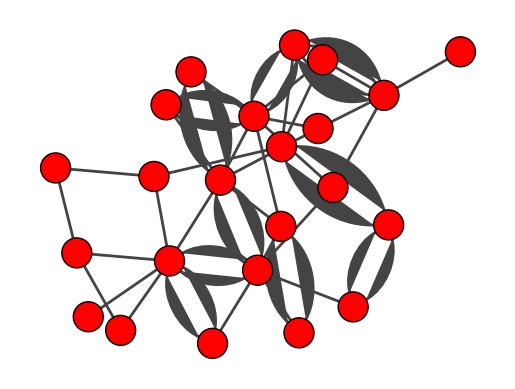

In [59]:
import igraph as ig
import matplotlib.pyplot as plt

# Assuming 'g' is your igraph graph object
fig, ax = plt.subplots()
ig.plot(g, target=ax)
plt.show()


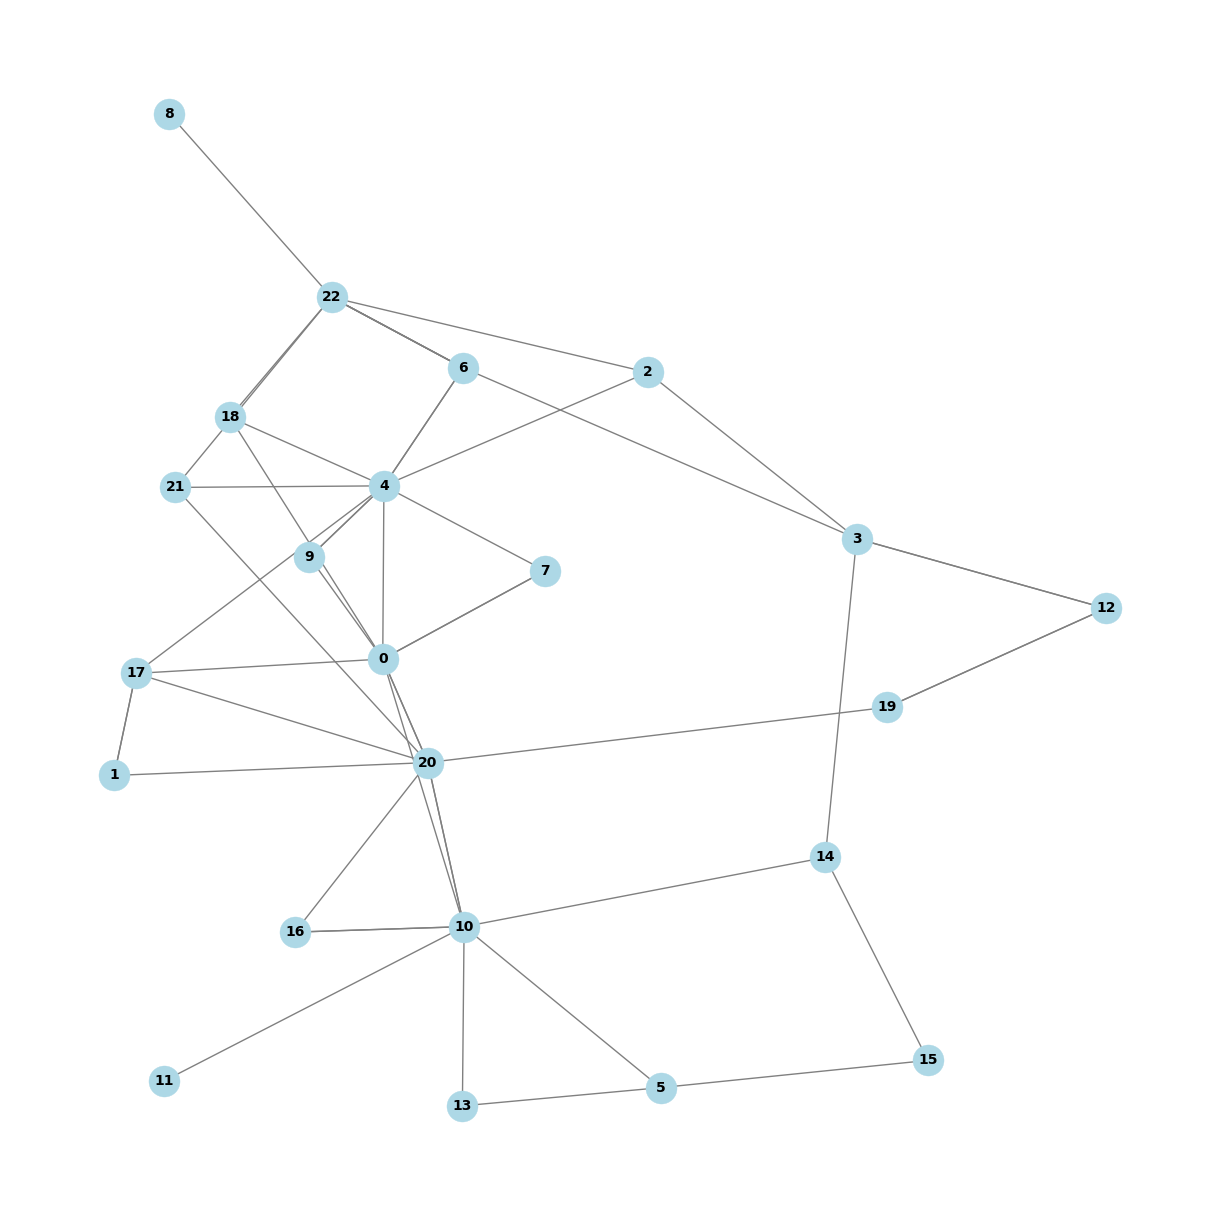

In [61]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt

# Convert igraph graph 'g' to a networkx graph
nx_graph = ig.Graph.to_networkx(g)

# Draw the networkx graph using matplotlib
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed
nx.draw(nx_graph, with_labels=True, node_size=500, node_color="lightblue", linewidths=0.25, font_size=10, font_weight="bold", edge_color="gray")
plt.show()


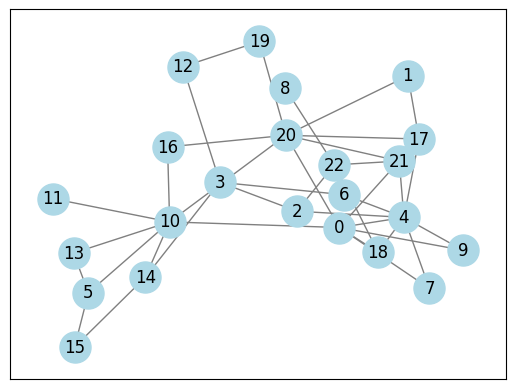

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'g' is your igraph graph object
nx_graph = nx.Graph(ig.Graph.to_networkx(g))

# Create a layout for our nodes
layout = nx.spring_layout(nx_graph, seed=42)

# Draw the nodes and the edges (including the width of the edges)
nx.draw_networkx_nodes(nx_graph, layout, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(nx_graph, layout, width=1, edge_color="gray")

# Draw the labels
node_labels = {node: node for node in nx_graph.nodes()}
nx.draw_networkx_labels(nx_graph, layout, labels=node_labels, font_size=12)

# Show the plot
plt.show()
